<a href="https://colab.research.google.com/github/333pehr/Avocado_maturity_meter/blob/main/AvocadoMaturityMeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset to the Project

At first, we will check the data type of the features exist in dataset `data.csv`

In [ ]:
import pandas as pd
import numpy as np

row_dataset = pd.read_csv('data.csv')
row_dataset.dtypes

avocado_no                       int64
number_of_days_from_harvest      int64
L                              float64
a                              float64
b                              float64
maturity_state                   int64
dtype: object

In [ ]:
row_dataset.describe()

,avocado_no,number_of_days_from_harvest,L,a,b,maturity_state
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,5.527027,9.094595,37.501041,-10.067541,18.516822,0.500000
std,2.883498,5.849185,4.424240,4.042415,4.935462,0.663162
min,1.000000,1.000000,21.750000,-16.540000,1.700000,0.000000
25%,3.000000,4.000000,35.707500,-12.810000,16.267500,0.000000
50%,6.000000,8.000000,38.090000,-11.015000,19.225000,0.000000
75%,8.000000,14.000000,39.900000,-8.535000,21.740000,1.000000
max,10.000000,21.000000,96.650000,4.100000,35.010000,2.000000


## Row Data

We will show the row version of the data as table here

In [ ]:
row_dataset.head()

,avocado_no,number_of_days_from_harvest,L,a,b,maturity_state
0,1,1,40.48,-12.36,18.76,0
1,1,1,40.64,-14.05,22.17,0
2,1,1,38.29,-13.48,17.91,0
3,1,1,41.77,-11.58,20.91,0
4,1,1,38.27,-10.72,18.54,0


### Row Data Visualisation
Without conducting any preprocessing, a discernible relationship between color features `L` and `a` can be observed from the graphs below.

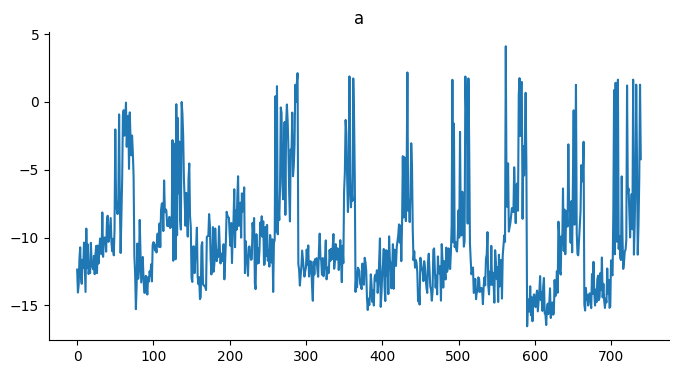

In [ ]:
# @title a

from matplotlib import pyplot as plt
row_dataset['a'].plot(kind='line', figsize=(8, 4), title='a')
plt.gca().spines[['top', 'right']].set_visible(False)

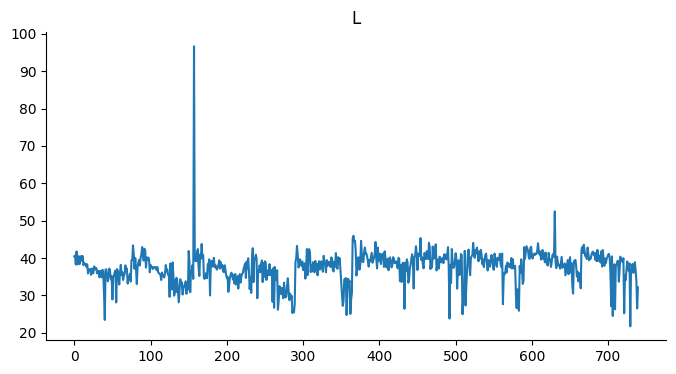

In [ ]:
# @title L

from matplotlib import pyplot as plt
row_dataset['L'].plot(kind='line', figsize=(8, 4), title='L')
plt.gca().spines[['top', 'right']].set_visible(False)

This table is shown only to see if any days have missed for each avocado

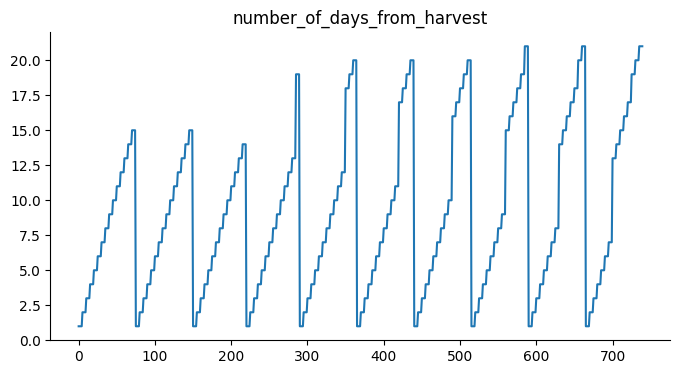

In [ ]:
from matplotlib import pyplot as plt
row_dataset['number_of_days_from_harvest'].plot(kind='line', figsize=(8, 4), title='number_of_days_from_harvest')
plt.gca().spines[['top', 'right']].set_visible(False)

## Data Manipulation and Processing

Given that five different images are captured each day, there are five distinct sets of L*a*b color values available in the dataset. To streamline data processing and reduce its volume, we will aggregate the number of images taken for each day and compute the mean values for the color features L, a, and b.

In [25]:
days_group = row_dataset.groupby(['avocado_no', 'number_of_days_from_harvest'])
processed_data = days_group.mean()
processed_data.to_csv('processed_data.csv')
processed_data.head()

L       a       b  maturity_state
avocado_no number_of_days_from_harvest                                        
1          1                            39.890 -12.438  19.658             0.0
           2                            39.480 -12.112  18.294             0.0
           3                            38.986 -11.656  18.526             0.0
           4                            37.448 -11.950  18.876             0.0
           5                            36.508 -11.960  18.998             0.0

### Data Visualization After Data Manipulation

#### Color feature `L` vs Maturity State



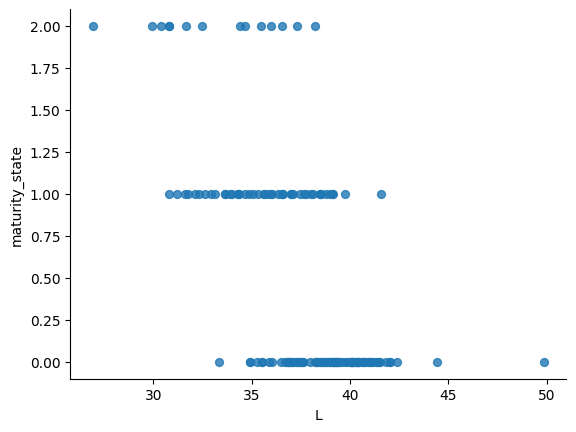

In [ ]:
from matplotlib import pyplot as plt
processed_data.plot(kind='scatter', x='L', y='maturity_state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Color feature `a` vs Maturity State

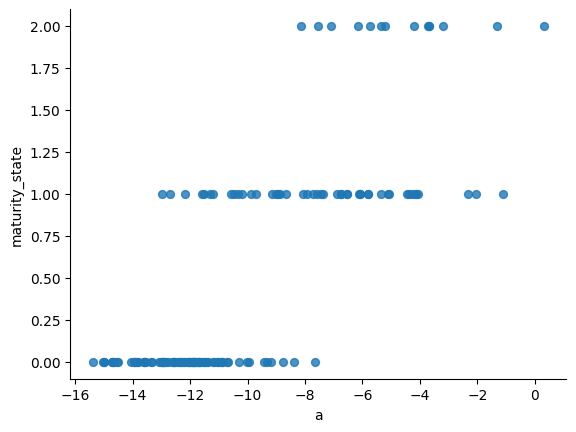

In [ ]:
processed_data.plot(kind='scatter', x='a', y='maturity_state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Color feature `b` vs Maturity State

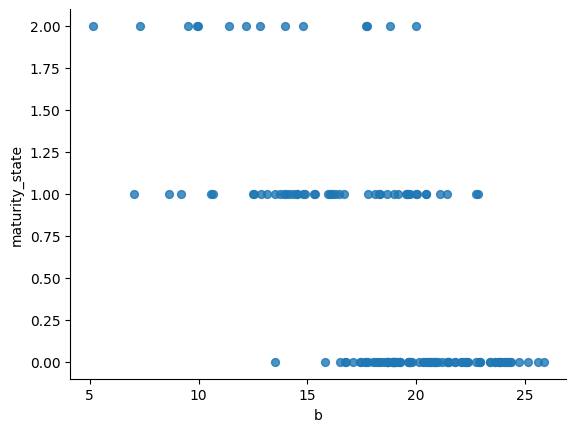

In [ ]:
processed_data.plot(kind='scatter', x='b', y='maturity_state', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)